Shape of CSD data (1156, 257)


Text(0.5, 1.0, 'Spatial Spectrum @10Hz')

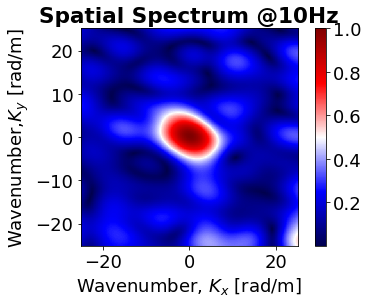

In [4]:
# Code from https://stackoverflow.com/questions/70768384/right-method-for-finding-2-d-spatial-spectrum-from-cross-spectral-densities

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import cmath

# Set up data
# Distance[Meter] between sensors 
x = [2.1,2.1,-0.7,-2.1,-2.1,-0.7,-0.7,0.6,-5.7,-8.5,-11.4,-7.7,-6.3,-3.5,-2.1,-3.4,5.4,-5.2,-8.9,-10,-10,5.4,5.4,-0.8,-3.6,-6.2,-6.8,-12.2,-17.1,-19,-18.6,-13.5,14.8,14.8]
y = [6.65,4.15,3.65,5.05,7.25,8.95,11.85,8.95,-2,-0.6,-0.9,1.25,2.9,0.9,-0.1,-1.4,9.2,5.2,4.8,6.1,8.9,13.3,17.1,17.9,13.8,-9.3,-5.2,-3.6,-3.6,-0.9,3.7,3.7,-1.8,5.7]

if (len(x) != len(y)):
    raise Exception('X and Y lengthd differ')

n = len(x)
dx = np.array(x);  M = len(dx)
dy = np.array(y) ; N = len(dy)

np.random.seed(12345)
raw_data=np.reshape(np.random.rand(10000*n),(10000,n))

f = 10  # frequency in Hz
c = 50  # wave speed 50, 80, 100, 200  m/s
k = 2.0*np.pi*f/c  # wavenumber
kx = np.linspace(-20*k,20*k,n*10)  # space vector
ky=  np.linspace(-20*k,20*k,n*10)   # space vector


# Finding cross spectral density (CSD)
fs=500
def csdMat(data):
    rows, cols = data.shape
    total_csd = []
  
    for i in range(cols):
        for j in range(cols):
            f, Pxy = signal.csd(data[:,i], data[:,j], fs, nperseg=512)
            #real_csd = np.real(Pxy)
            total_csd.append(Pxy)                     # output as list
            
    return np.array(total_csd)

## Spatial Spectra:- DFT of the csd along two dimension

def DFT2D(data):
    #data = np.asarray(data)
    dft2d = np.zeros((len(kx),len(ky)), dtype=complex)
    for k in range(len(kx)):
        for l in range(len(ky)):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    e = cmath.exp(- 1j * ((kx[k] * dx[m]) / len(dx) + (ky[l] * dy[n]) / len(dy)))
                    sum_matrix +=  data[m,n] * e
            dft2d[k,l] = sum_matrix
    return dft2d


# Call the seismic array
#** Open .NPY files as an array 
#with open('res_array_1000f_131310.npy', 'rb') as f:
#    arr= np.load(f)
#raw_data = arr[0:10000, :]

#CSD of the seismic data
csd = csdMat(raw_data)
print('Shape of CSD data', csd.shape)

# CSD data of a specific frequency
csd_dat=csd[:, 11]  
fcsd = np.reshape(csd_dat, (-1, n))

dft = DFT2D(fcsd)  # Data or cross-correlation matrix
spec = np.abs(dft) #dft.real    # Spectrum or 2D_DFT of data[real part]

spec = spec/spec.max()

plt.figure()
c = plt.imshow(spec, cmap ='seismic', vmin = spec.min(), vmax = spec.max(),
                 extent =[kx.min(), kx.max(), ky.min(), ky.max()],
                interpolation ='nearest', origin ='lower')
plt.colorbar(c)
plt.rcParams.update({'font.size': 18})
plt.xlabel("Wavenumber, $K_x$ [rad/m]", fontsize=18)
plt.ylabel("Wavenumber,$K_y$ [rad/m]", fontsize=18)
plt.title(f'Spatial Spectrum @10Hz', weight="bold")